# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"


# list the data sets    
cloudiness = [] 
country = []     
date = []         
lat = []       
lng = []         
max_temp = []     
wind_speed = [] 
humidity = []
city_name = []


#start the looping process going through cities as query

print('Beginning Data Retrieval')
print('---------------------')
i = 1

#start a look through the url query 
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#push out the query, but also extract the missing data and replacing it with except error
#except error response allow your query with missing data. it wont timeout
    try: 
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])      
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        city_name.append(response["name"])
        wind_speed.append(response['wind']['speed'])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
         print("City not found. skipping.")

print('---------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
---------------------
Processing record 1|cape town
Processing record 2|east london
Processing record 3|chokurdakh
Processing record 4|port elizabeth
Processing record 5|punta arenas
City not found. skipping.
Processing record 6|trapani
Processing record 7|kaitangata
Processing record 8|pangody
Processing record 9|rikitea
Processing record 10|baykit
Processing record 11|jamestown
Processing record 12|saskylakh
Processing record 13|hobart
Processing record 14|kupang
City not found. skipping.
City not found. skipping.
Processing record 15|samarai
Processing record 16|beringovskiy
Processing record 17|atuona
Processing record 18|zhuhai
Processing record 19|comodoro rivadavia
Processing record 20|buala
Processing record 21|butaritari
Processing record 22|puerto ayora
City not found. skipping.
Processing record 23|port alfred
Processing record 24|hilo
Processing record 25|vaini
City not found. skipping.
Processing record 26|ribeira grande
Processing record 27|broken

Processing record 242|caohai
Processing record 243|leningradskiy
Processing record 244|svetlogorsk
Processing record 245|rafaela
Processing record 246|montepuez
Processing record 247|kodiak
Processing record 248|baihar
Processing record 249|aasiaat
Processing record 250|sibolga
Processing record 251|slave lake
Processing record 252|vardo
Processing record 253|cochrane
Processing record 254|ariquemes
Processing record 255|moron
Processing record 256|acapulco
Processing record 257|kimbe
Processing record 258|balaipungut
City not found. skipping.
Processing record 259|almeria
Processing record 260|kasulu
Processing record 261|sainte-marie
Processing record 262|piritiba
Processing record 263|bermejo
Processing record 264|kollam
Processing record 265|urumqi
Processing record 266|fairbanks
Processing record 267|houma
Processing record 268|geraldton
Processing record 269|takaka
Processing record 270|malmesbury
Processing record 271|gravdal
Processing record 272|chifeng
Processing record 273|d

Processing record 488|palmeira
Processing record 489|ashqelon
Processing record 490|sur
City not found. skipping.
Processing record 491|la rioja
Processing record 492|niamey
Processing record 493|manta
Processing record 494|sa kaeo
Processing record 495|chara
Processing record 496|kalmunai
Processing record 497|longjiang
Processing record 498|olmos
Processing record 499|tura
Processing record 500|havelock
Processing record 501|college
Processing record 502|male
Processing record 503|adrar
Processing record 504|kidodi
Processing record 505|zlobin
Processing record 506|altamira
Processing record 507|kirby
Processing record 508|mahebourg
Processing record 509|high level
Processing record 510|saint-pierre
City not found. skipping.
Processing record 511|lotofaga
Processing record 512|dandong
Processing record 513|asfi
Processing record 514|tukrah
City not found. skipping.
City not found. skipping.
City not found. skipping.
Processing record 515|kapasan
Processing record 516|paamiut
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#export cities csv file and display it as a dataset
output_data_file = pd.DataFrame({"City":city_name, 
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Humidity":humidity,
                        "Cloudiness":cloudiness, 
                        "Wind Speed":wind_speed,
                        "Country":country,
                        "Date":date})
#Exporting data to csv
output_data_file.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,69.01,83,0,14.97,ZA,1612841692
1,East London,-33.0153,27.9116,60.80,94,0,2.30,ZA,1612841777
2,Chokurdakh,70.6333,147.9167,-13.31,84,9,9.86,RU,1612841946
3,Port Elizabeth,-33.9180,25.5701,62.60,88,0,3.44,ZA,1612841656
4,Punta Arenas,-53.1500,-70.9167,55.40,76,0,5.75,CL,1612841904


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

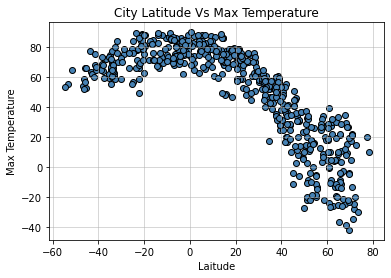

In [7]:
#Begin creating scatter plot using maps to get lat & lon
plt.scatter(output_data_file["Lat"],output_data_file["Max Temp"], facecolor = "steelblue",edgecolor = "black")
plt.title("City Latitude Vs Max Temperature")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature")
#plot the gridline
plt.grid(linestyle='-',linewidth=1, alpha = 0.5)
plt.savefig("../output_data/City Latitude vs Max Temperature.png")


## Latitude vs. Humidity Plot

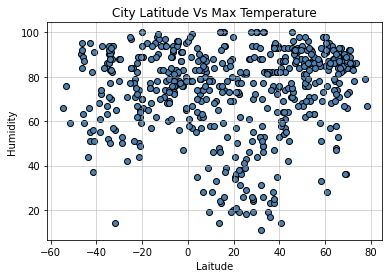

In [8]:
#scatter graph plotting the lat vs humidity 
plt.scatter(output_data_file["Lat"],output_data_file["Humidity"], facecolor = "steelblue",edgecolor = "black")
plt.title("City Latitude Vs Max Temperature")
plt.xlabel("Laitude")
plt.ylabel("Humidity")
#plot the gridline
plt.grid(linestyle='-',linewidth=1, alpha = 0.5)
plt.savefig("../output_data/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

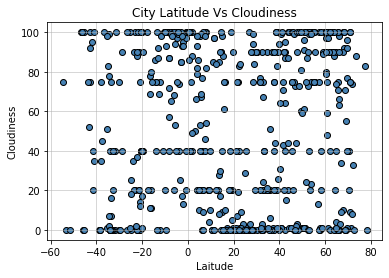

In [9]:
#scatter graph plotting the lat vs Cloudiness
plt.scatter(output_data_file["Lat"],output_data_file["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude Vs Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness")
#plot the gridline
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../output_data/Latitude vs. Cloudiness Plot.png")

## Latitude vs. Wind Speed Plot

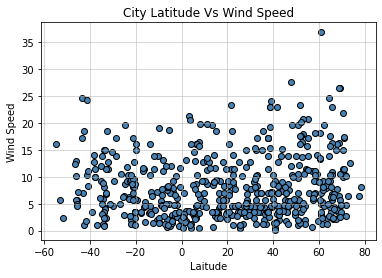

In [10]:
#scatter graph plotting the lat vs Wind Speed
plt.scatter(output_data_file["Lat"],output_data_file["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude Vs Wind Speed")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed")
#plot the gridline
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../output_data/Latitude vs. Wind Speed Plot.png")

## Linear Regression

In [11]:
#northern and southern hemisphere data frame with linear regression
#start by creating the linear regression and line plot 
def linear_plot(x_val,y_val):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_val = x_val * slope + intercept
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_val,"r-")
    plt.annotate(line,(x_val.median(),y_val.median()),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")
    return line
    
    
    
#def annotate(line, a, b):
    #plt.annotate(line, (a,b),fontsize=15,color="red")
    
#Create the dataframe for the northern and southern hemisphere
Northern_hemisphere = output_data_file.loc[output_data_file["Lat"]>0]
Southern_hemisphere = output_data_file.loc[output_data_file["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8778094904842615
y = -1.39x + 92.41


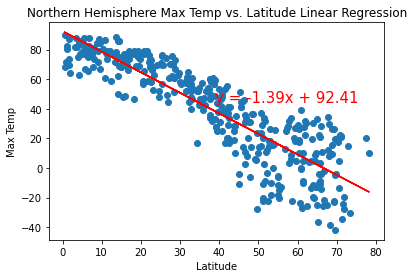

In [12]:
#plot the grapth and the linear regression line
#plot the Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_val = Northern_hemisphere["Lat"]
y_val = Northern_hemisphere["Max Temp"]
plt.title("Northern Hemisphere Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(linear_plot(x_val,y_val))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6161431830968206
y = 0.42x + 82.38


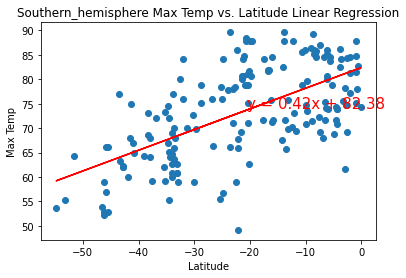

In [13]:
#plot the grapth and the linear regression line
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_val = Southern_hemisphere["Lat"]
y_val = Southern_hemisphere["Max Temp"]
plt.title("Southern_hemisphere Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(linear_plot(x_val,y_val))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.26586233149610716
y = 0.27x + 61.94


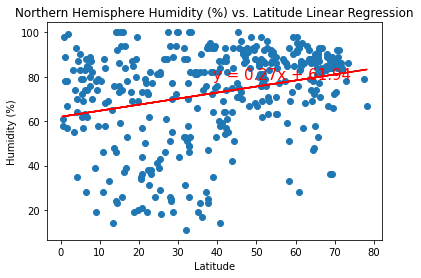

In [14]:
#plot the grapth and the linear regression line
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_val = Northern_hemisphere["Lat"]
y_val = Northern_hemisphere["Humidity"]
plt.title("Northern Hemisphere Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(linear_plot(x_val,y_val))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20687903927409518
y = 0.22x + 81.84


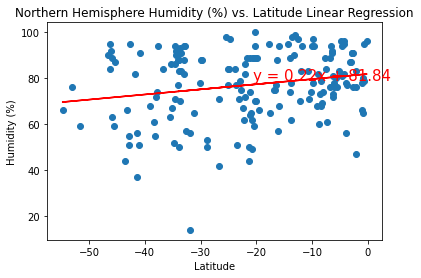

In [15]:
#plot the grapth and the linear regression line
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_val = Southern_hemisphere["Lat"]
y_val = Southern_hemisphere["Humidity"]
plt.title("Northern Hemisphere Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(linear_plot(x_val,y_val))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14386993760553282
y = 0.28x + 38.55


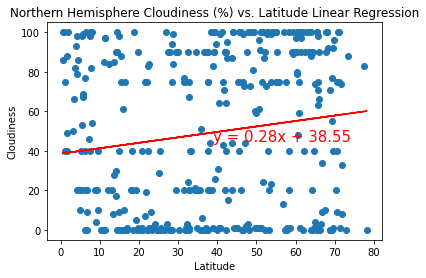

In [16]:
#plot the grapth and the linear regression line
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_val = Northern_hemisphere["Lat"]
y_val = Northern_hemisphere["Cloudiness"]
plt.title("Northern Hemisphere Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(linear_plot(x_val,y_val))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.30782532830004616
y = 0.87x + 74.6


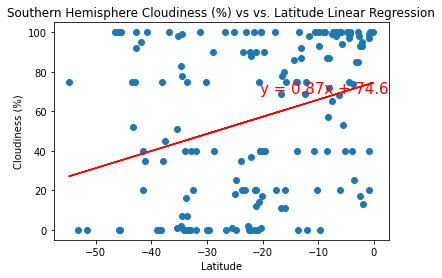

In [17]:
#plot the grapth and the linear regression line
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_val = Southern_hemisphere["Lat"]
y_val = Southern_hemisphere["Cloudiness"]
plt.title("Southern Hemisphere Cloudiness (%) vs vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(linear_plot(x_val,y_val))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14617488684687638
y = 0.04x + 6.64


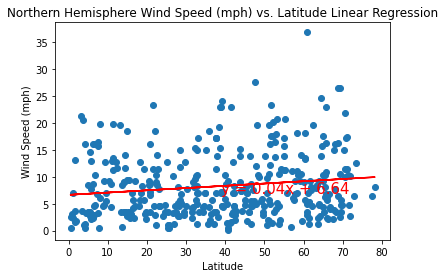

In [18]:
#plot the grapth and the linear regression line
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_val = Northern_hemisphere["Lat"]
y_val = Northern_hemisphere["Wind Speed"]
plt.title("Northern Hemisphere Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(linear_plot(x_val,y_val))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.26733841533734415
y = -0.1x + 5.3


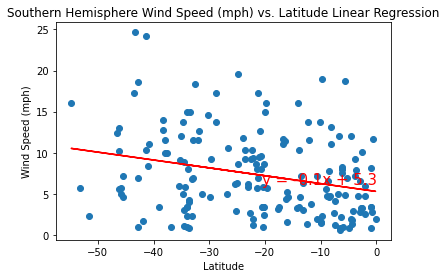

In [19]:
#plot the grapth and the linear regression line
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression¶
x_val = Southern_hemisphere["Lat"]
y_val = Southern_hemisphere["Wind Speed"]
plt.title("Southern Hemisphere Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(linear_plot(x_val,y_val))